In [1]:
import gymnasium as gym
from gymnasium.wrappers import FrameStackObservation
from gymnasium.wrappers.atari_preprocessing import AtariPreprocessing
import ale_py

import random
import numpy as np
import torch

import stable_baselines3 as sb3

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm

from IPython.display import HTML

In [2]:
gym_environment = "ALE/MsPacman-v5"

In [3]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)

gym.register_envs(ale_py)

env = gym.make(gym_environment)

obs, info = env.reset(seed=1)

A.L.E: Arcade Learning Environment (version 0.10.2+c9d4b19)
[Powered by Stella]


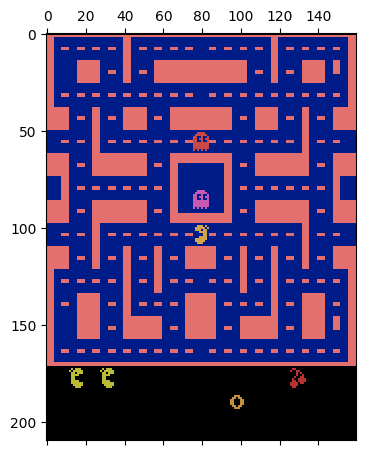

In [4]:
plt.matshow(obs)
plt.show()

In [5]:
obs.shape

(210, 160, 3)

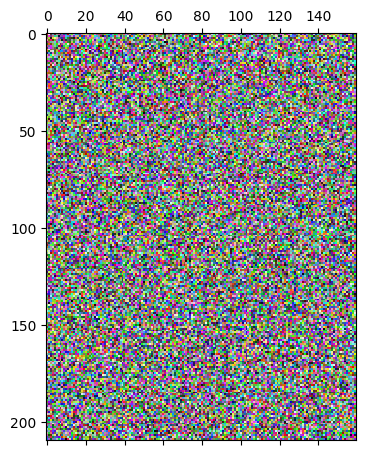

In [6]:
plt.matshow(env.observation_space.sample())
plt.show()

In [7]:
env = gym.make("ALE/MsPacman-v5", frameskip=1, render_mode="rgb_array_list")
env = AtariPreprocessing(
    env,
    noop_max=30,
    frame_skip=3, # 3 + 1 = 4 ?
    screen_size=84,
    terminal_on_life_loss=False,
    grayscale_obs=True,
    scale_obs=False, # as we'll use below CnnPolicy..
)

In [8]:
obs, info = env.reset(seed=1)

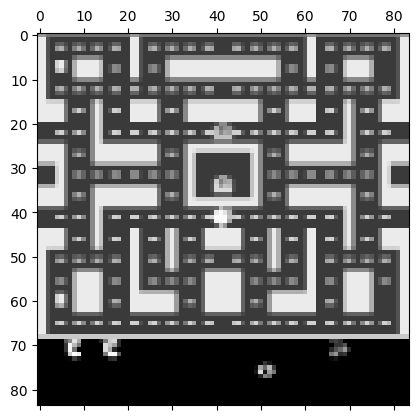

In [9]:
plt.matshow(obs, cmap='Greys_r')
plt.show()

In [10]:
obs.shape

(84, 84)

In [11]:
env = FrameStackObservation(env, stack_size=4)

In [12]:
obs, info = env.reset(seed=1)

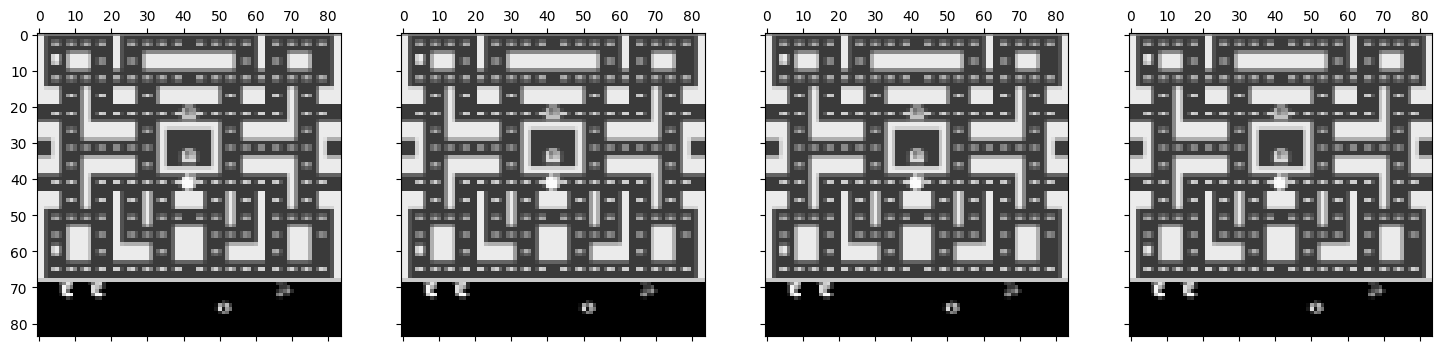

In [13]:
fig, axs = plt.subplots(1, len(obs), sharey=True, figsize=(18, 10))
for ax, obs_frame in zip(axs, obs):
    ax.matshow(obs_frame, cmap='Greys_r')
plt.show()

In [14]:
agent = sb3.A2C("CnnPolicy", env) # AKA: policy (or model)
agent.learn(total_timesteps=5_000, progress_bar=True)

Output()

In [15]:
#env.close()

In [16]:
observation, info = env.reset(seed=42)
steps = 0
for _ in range(100):
    action, _state = agent.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    steps += 1
    if terminated or truncated:
        break

In [17]:
frames=env.render()

In [18]:
len(frames)

312

In [19]:
steps

100

In [20]:
frames[0].shape

(210, 160, 3)

In [21]:
fig = plt.figure()
im = plt.imshow(frames[0])

plt.close() # this is required to not display the generated image

def init():
    im.set_data(frames[0])

def animate(i):
    im.set_data(frames[i])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames),
                               interval=50)
HTML(anim.to_html5_video())